In [37]:
from func import *
import matplotlib.pyplot as plt
from tensorflow import summary as sm
from tensorflow import keras
from keras import models, layers
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import datetime
import os
import requests
from openpyxl import Workbook
from scipy.signal import butter, lfilter
import tensorflow
import numpy


%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [38]:
VERSION = 'LSTM Error LFP'

FILE_00 = 'data.csv'
FILE_01 = 'data1.csv'
FILE_02 = 'data2.csv'
drop_labels_x = ['Data_Point', 'Test_Time(s)', 'Date_Time', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)'\
                 , 'Discharge_Energy(Wh)', 'Internal_Resistance(Ohm)', 'Is_FC_Data','AC_Impedance(Ohm)','ACI_Phase_Angle(Deg)','Have_Capacity(Ah)','SoC(%)','dV/dt(V/s)']
drop_labels_y = ['Data_Point', 'Test_Time(s)', 'Date_Time', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Charge_Capacity(Ah)', 'Current(A)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', \
                 'Discharge_Energy(Wh)', 'dV/dt(V/s)', 'Internal_Resistance(Ohm)', 'Is_FC_Data', 'AC_Impedance(Ohm)','ACI_Phase_Angle(Deg)','Voltage(V)','Have_Capacity(Ah)']

param = {'seq_len' : 20, 'num_units' : 150, 'num_filters' : 128, 'window' : 5, 'dropout': 0.2, 'num_epochs' : 6000, 'num_dense': 80, 'batch':200}
Fsize=5

log_dir = f"logs/{VERSION}/" + datetime.datetime.now().strftime("%Y%m%d-%H%M") + f'-{param["num_epochs"]}'
file_path = f'weight\{VERSION}\SOH_Checkpoint\{param["num_epochs"]}\{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}.h5'
hist_freq = 250

save_path = f'picture\{VERSION}\{Fsize}\{param["num_epochs"]}EP'
try:
    if not os.path.exists(save_path):
        os.makedirs(save_path)
except OSError:
    print('Error Creating Directory...')

Index(['Current(A)', 'Voltage(V)'], dtype='object')
Index(['SoC(%)'], dtype='object')
Index(['Current(A)', 'Voltage(V)'], dtype='object')
Index(['SoC(%)'], dtype='object')
Index(['Current(A)', 'Voltage(V)'], dtype='object')
Index(['SoC(%)'], dtype='object')
data00 = (11077, 2)
data00 = [[99.97970212]
 [99.96062304]
 [99.93260667]
 [99.89849523]
 [99.86015897]
 [99.82739695]]
p =  [-1.53447568  3.84123802]
data00 = <class 'numpy.ndarray'>


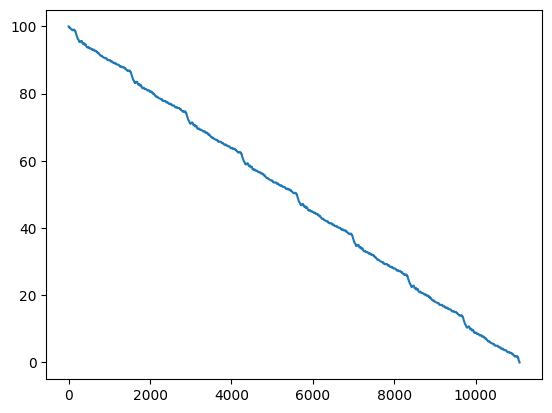

data01 = (10628, 2)


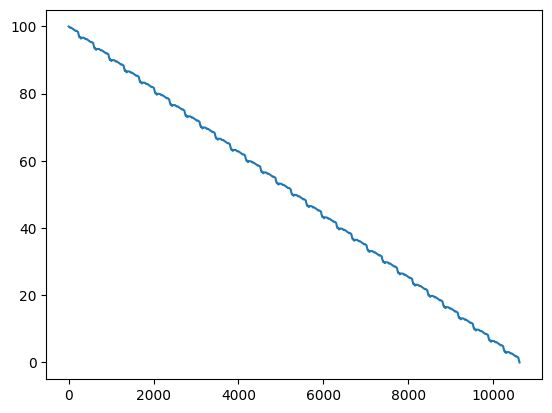

data_test = (11166, 2)


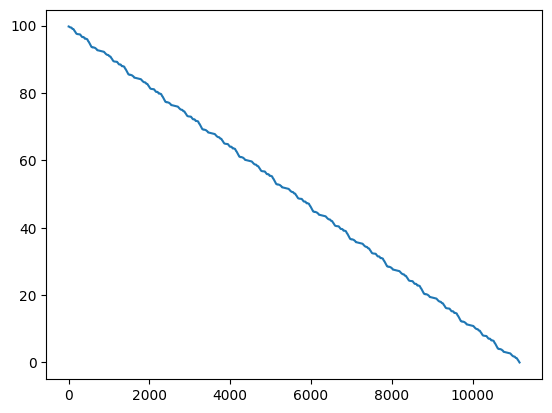

In [39]:
data00, data_cap00 = get_data(FILE_00, drop_labels_x, drop_labels_y)
data01, data_cap01 = get_data(FILE_01, drop_labels_x, drop_labels_y)
data_test, data_cap_test = get_data(FILE_02, drop_labels_x, drop_labels_y)
data00 = data00[2604:]
data_cap00 = data_cap00[2604:]
data01 = data01[1933:]
data_cap01 = data_cap01[1933:]
data_test = data_test[1271:]
data_cap_test = data_cap_test[1271:]
p=0
print(f'data00 = {data00.shape}')
print(f'data00 = {data_cap00[0:6]}')
p=data00[0:5]
print(f'p =  {p[1]}')
print(f'data00 = {type(data_cap00)}')
pl.plot(data_cap00)
pl.show()
print(f'data01 = {data01.shape}')
pl.plot(data_cap01)
pl.show()
print(f'data_test = {data_test.shape}')
pl.plot(data_cap_test)
pl.show()
savedata00 =  data00
savedata_cap00 =  data_cap00
savedata01 =  data01
savedata_cap01 =  data_cap01
savedata_test = data_test
savedata_cap_test = data_cap_test

In [40]:
# #1/n 필터
# data00 = lowpass1(data00, Fsize)[Fsize:]
# data_cap00 = lowpass1(data_cap00,Fsize)[Fsize:]
# data01 = lowpass1(data01,Fsize)[Fsize:]
# data_cap01 = lowpass1(data_cap01,Fsize)[Fsize:]
# data_test = lowpass1(data_test,Fsize)[Fsize:]
# data_cap_test = lowpass1(data_cap_test,Fsize)[Fsize:]

# size=(int)(savedata00.shape[0]-Fsize/2)
# Edata00 =  savedata00[Fsize:size]-data00
# Edata_cap00 =  savedata_cap00[Fsize:size]-data_cap00
# Edata01 =  savedata01[Fsize:size]-data01
# Edata_cap01 =  savedata_cap01[Fsize:size]-data_cap01
# Edata_test = savedata_test[Fsize:size]-data_test
# Edata_cap_test = savedata_cap_test[Fsize:size]-data_cap_test
# print(f'data00 = {data00.shape}')
# print(f'Edata00 = {Edata00.shape}')
# pl.plot(Edata_cap00)
# pl.show()
# pl.plot(Edata_cap01)
# pl.show()
# pl.plot(Edata_cap_test)
# pl.show()

# print(Edata_cap_test)
# #numpy array 생성
 
# arr = Edata_cap00
 
# np.savetxt('sample.csv',arr,delimiter=",")
# arr1 = Edata_cap01
 
# np.savetxt('sample1.csv',arr1,delimiter=",")
# arr2 = Edata_cap_test
 
# np.savetxt('sample2.csv',arr2,delimiter=",")

# arr3 = data_cap00
 
# np.savetxt('sample3.csv',arr3,delimiter=",")
# arr4 = data_cap01
 
# np.savetxt('sample4.csv',arr4,delimiter=",")
# arr5 = data_cap_test
 
# np.savetxt('sample5.csv',arr5,delimiter=",")




In [41]:
# #1/n 필터 뒤
# data00 = lowpass(data00, Fsize)[Fsize:]
# data_cap00 = lowpass(data_cap00,Fsize)[Fsize:]
# data01 = lowpass(data01,Fsize)[Fsize:]
# data_cap01 = lowpass(data_cap01,Fsize)[Fsize:]
# data_test = lowpass(data_test,Fsize)[Fsize:]
# data_cap_test = lowpass(data_cap_test,Fsize)[Fsize:]

# Edata00 =  savedata00[Fsize:]-data00
# Edata_cap00 =  savedata_cap00[Fsize:]-data_cap00
# Edata01 =  savedata01[Fsize:]-data01
# Edata_cap01 =  savedata_cap01[Fsize:]-data_cap01
# Edata_test = savedata_test[Fsize:]-data_test
# Edata_cap_test = savedata_cap_test[Fsize:]-data_cap_test
# print(f'data00 = {data00.shape}')
# print(f'Edata00 = {Edata00.shape}')
# pl.plot(Edata_test)
# pl.show()


data00 = (10626, 1)
Edata00 = (10628, 2)
data00 = (11075, 2)
Edata00 = (11075, 2)
data00 = (11075, 2)
Edata00 = (11075, 2)


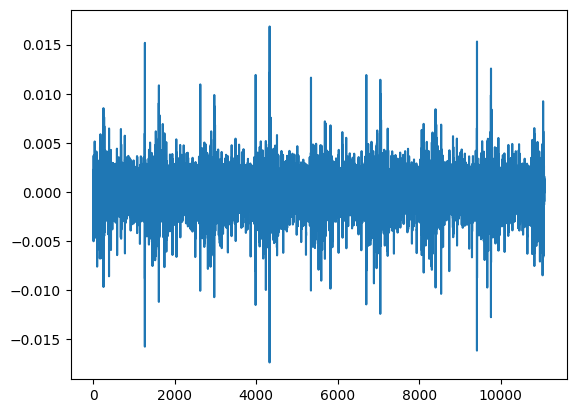

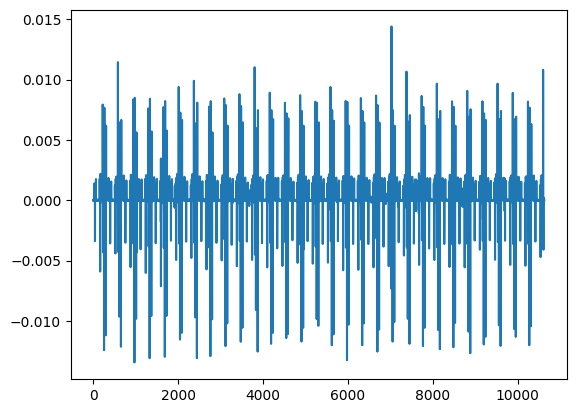

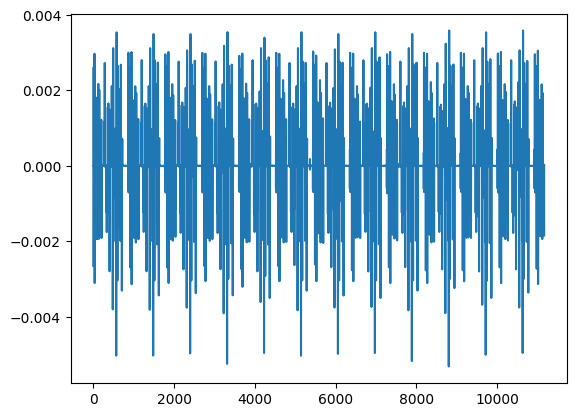

[[-2.65039398e-03]
 [-2.92302734e-06]
 [-3.04197266e-06]
 ...
 [ 3.23595898e-05]
 [-3.26344767e-05]
 [-1.84400828e-03]]


In [42]:
#3 필터계수 (0.25 0.5 0.25)
data00 = lowpass2(data00 )[1:]
data_cap00 = lowpass2(data_cap00)[1:]
data01 = lowpass2(data01)[1:]
data_cap01 = lowpass2(data_cap01)[1:]
data_test = lowpass2(data_test)[1:]
data_cap_test = lowpass2(data_cap_test)[1:]

size1=(int)(savedata00.shape[0])
size2=(int)(savedata01.shape[0])
size3=(int)(savedata_test.shape[0])
print(f'data00 = {data_cap01.shape}')
print(f'Edata00 = {savedata01.shape}')
Edata00 =  savedata00[1:size1-1]-data00
Edata_cap00 =  savedata_cap00[1:size1-1]-data_cap00
Edata01 =  savedata01[1:size2-1]-data01
Edata_cap01 =  savedata_cap01[1:size2-1]-data_cap01
Edata_test = savedata_test[1:size3-1]-data_test
Edata_cap_test = savedata_cap_test[1:size3-1]-data_cap_test
print(f'data00 = {data00.shape}')
print(f'Edata00 = {Edata00.shape}')
print(f'data00 = {data00.shape}')
print(f'Edata00 = {Edata00.shape}')
pl.plot(Edata_cap00)
pl.show()
pl.plot(Edata_cap01)
pl.show()
pl.plot(Edata_cap_test)
pl.show()

print(Edata_cap_test)
#numpy array 생성
 
arr = Edata_cap00
 
np.savetxt('sample.csv',arr,delimiter=",")
arr1 = Edata_cap01
 
np.savetxt('sample1.csv',arr1,delimiter=",")
arr2 = Edata_cap_test
 
np.savetxt('sample2.csv',arr2,delimiter=",")

arr3 = data_cap00
 
np.savetxt('sample3.csv',arr3,delimiter=",")
arr4 = data_cap01
 
np.savetxt('sample4.csv',arr4,delimiter=",")
arr5 = data_cap_test
 
np.savetxt('sample5.csv',arr5,delimiter=",")




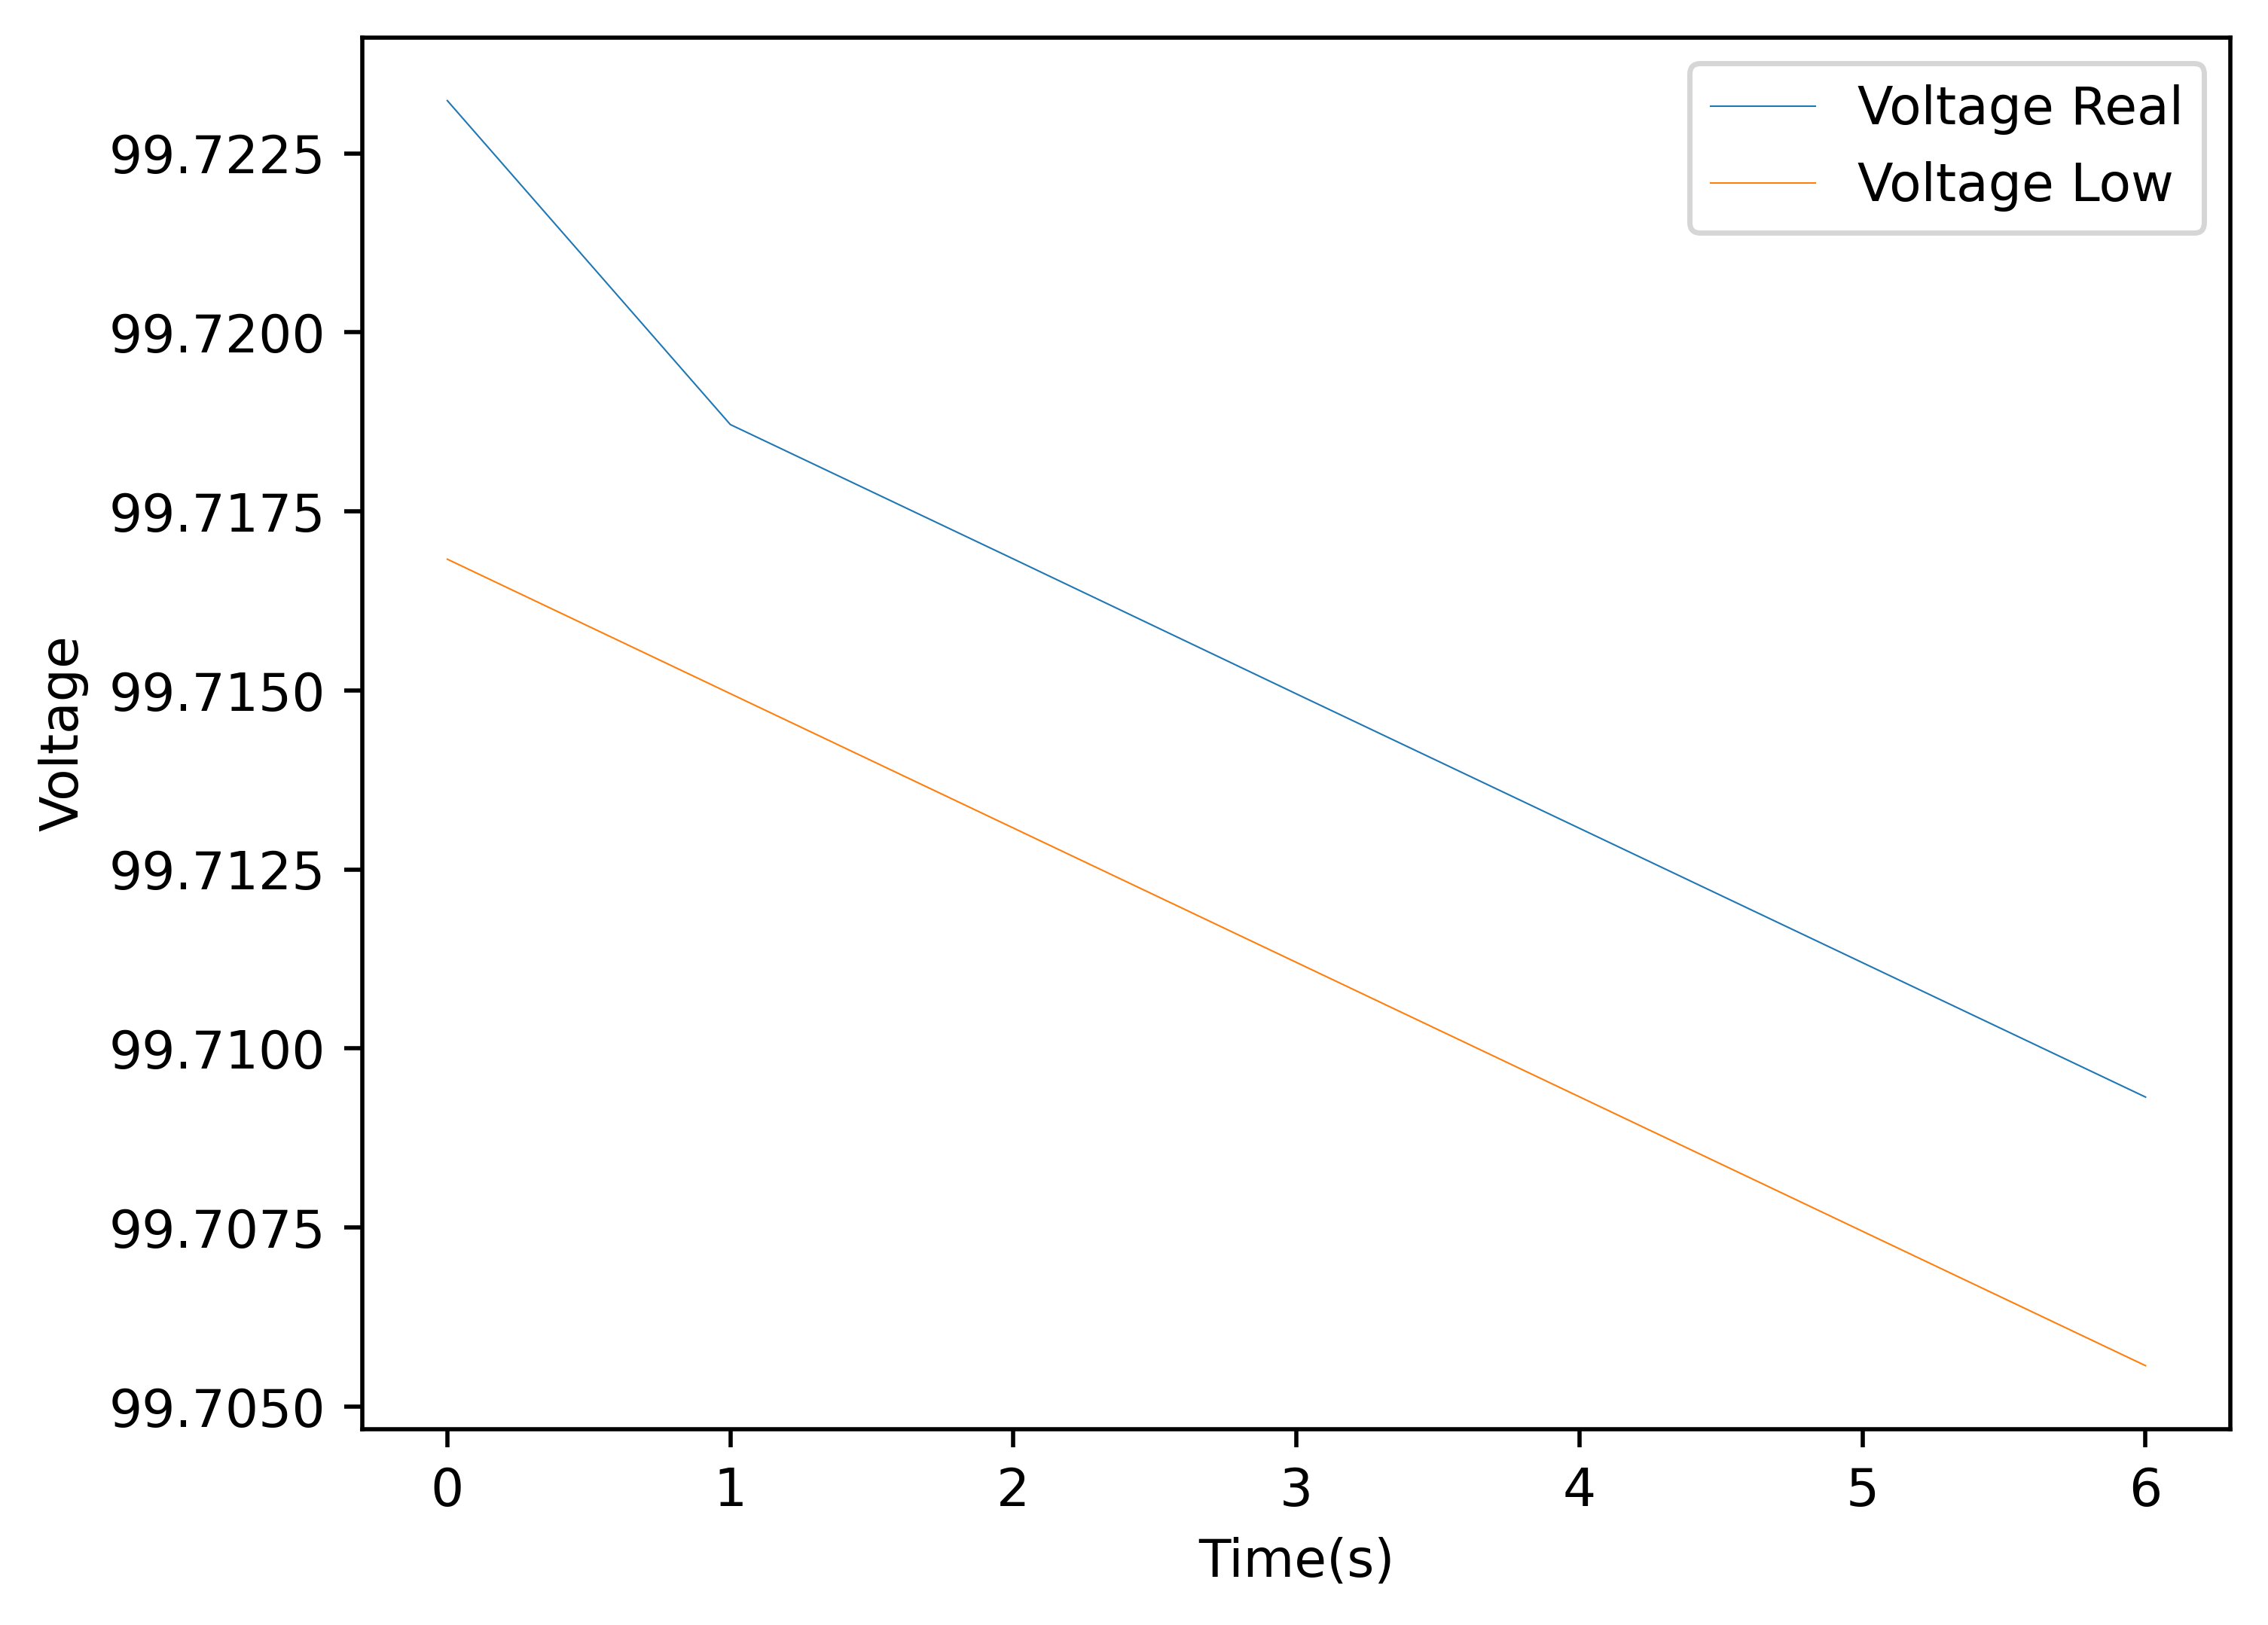

In [43]:
pl.figure(dpi=500)
pl.ylabel('Voltage')
pl.xlabel('Time(s)')
line = pl.plot(data_cap_test[:7], label = 'Voltage Real')
pl.setp(line, linewidth=0.3)

y_line = pl.plot(savedata_cap_test[3:10], label = 'Voltage Low')
# y_line = pl.plot(y_graph, label = 'Voltage Reference')
pl.setp(y_line, linewidth=0.3)
pl.legend()
pl.savefig(f'{save_path}\Estimation.png')
pl.show()

In [44]:
# Error_rate = []
# Error = []

# for step in range(len(data_cap_test)):
#         # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
#         Error_rate.append((data_cap_test[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
#         Error.append(Error_rate[step] / 100)
    
# RMSE_total = np.sqrt(np.mean(np.square(Error)))
# MAE_total = np.mean(np.absolute(Error))
# pl.figure(dpi=150)
# line = pl.plot(Error_rate)
# pl.ylim(-10, 10)
# pl.ylabel('SOC Error (%)')
# pl.xlabel('time(s)')
# pl.setp(line, color='b', linewidth=0.5)
# EP=param['num_epochs']
# pl.savefig(f'{save_path}\{Fsize}RMSE{RMSE_total:.6f}MAE{MAE_total:.6f}.png')
# pl.show()
# print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')


In [45]:
# size=(int)(data_cap_test.shape[0]+Fsize-1)
# data00 = relow1(data00,savedata00[Fsize:size],Fsize)[Fsize:]
# data_cap00 = relow1(data_cap00,savedata_cap00[Fsize:size],Fsize)[Fsize:]
# data01 = relow1(data01,savedata01[Fsize:size],Fsize)[Fsize:]
# data_cap01 = relow1(data_cap01,savedata_cap01[Fsize:size],Fsize)[Fsize:]
# data_test = relow1(data_test,savedata_test[Fsize:size],Fsize)[Fsize:]
# data_cap_test = relow1(data_cap_test,savedata_cap_test[Fsize:size],Fsize)[Fsize:]
# savedata_cap_test=savedata_cap_test[2*Fsize:size-1]
# print(f'data_cap_test = {data_cap_test.shape}')
# print(f'savedata_cap_test = {savedata_cap_test.shape}')

In [46]:
# pl.figure(dpi=500)
# pl.ylabel('Voltage')
# pl.xlabel('Time(s)')
# line = pl.plot(data_cap_test[0:100], label = 'Voltage Real')
# pl.setp(line, linewidth=0.3)

# y_line = pl.plot(savedata_cap_test[0:100], label = 'Voltage Low')
# # y_line = pl.plot(y_graph, label = 'Voltage Reference')
# pl.setp(y_line, linewidth=0.3)
# pl.legend()
# pl.savefig(f'{save_path}\Estimation.png')
# pl.show()

In [47]:
# Error_rate = []
# Error = []

# for step in range(len(data_cap_test)):
#         # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
#         Error_rate.append((data_cap_test[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
#         Error.append(Error_rate[step] / 100)
    
# RMSE_total = np.sqrt(np.mean(np.square(Error)))
# MAE_total = np.mean(np.absolute(Error))
# pl.figure(dpi=150)
# line = pl.plot(Error_rate)
# pl.ylim(-10, 10)
# pl.ylabel('SOC Error (%)')
# pl.xlabel('time(s)')
# pl.setp(line, color='b', linewidth=0.5)
# EP=param['num_epochs']
# pl.savefig(f'{save_path}\{Fsize}RMSE{RMSE_total:.6f}MAE{MAE_total:.6f}.png')
# pl.show()
# print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')


In [48]:
x_train00 = seq_gen_x(data00, param['seq_len'])
y_train00 = seq_gen_y(data_cap00, param['seq_len'])
x_train01 = seq_gen_x(data01, param['seq_len'])
y_train01 = seq_gen_y(data_cap01, param['seq_len'])
x_test = seq_gen_x(data_test, param['seq_len'])
y_test = seq_gen_y(data_cap_test, param['seq_len'])

plus=15

Ex_train00 = seq_gen_x(Edata00, param['seq_len'])+plus
Ey_train00 = seq_gen_y(Edata_cap00, param['seq_len'])+plus
Ex_train01 = seq_gen_x(Edata01, param['seq_len'])+plus
Ey_train01 = seq_gen_y(Edata_cap01, param['seq_len'])+plus
Ex_test = seq_gen_x(Edata_test, param['seq_len'])+plus
Ey_test = seq_gen_y(Edata_cap_test, param['seq_len'])+plus
print(x_train00.shape)
print(y_test.shape)
print(x_train00[0, 0:6, 1])
count=savedata_cap_test.shape[0]-y_test.shape[0]*y_test.shape[1]
print(count)

(11054, 20, 2)
(11143, 1)
[3.8452852 3.815903  3.7942507 3.8091848 3.8587217 3.8454876]
23


In [49]:
# #5 필터계수 (-0.125 0.25 0.75 0.25 -0.125)
# data00 = lowpass3(data00)[2:]
# data_cap00 = lowpass3(data_cap00)[2:]
# data01 = lowpass3(data01)[2:]
# data_cap01 = lowpass3(data_cap01)[2:]
# data_test = lowpass3(data_test)[2:]
# data_cap_test = lowpass3(data_cap_test)[2:]
# print(f'data00 = {data00.shape}')
# size=(int)(savedata00.shape[0])
# Edata00 =  savedata00[2:size-2]-data00
# Edata_cap00 =  savedata_cap00[2:size-2]-data_cap00
# Edata01 =  savedata01[2:size-2]-data01
# Edata_cap01 =  savedata_cap01[2:size-2]-data_cap01
# Edata_test = savedata_test[2:size-2]-data_test
# Edata_cap_test = savedata_cap_test[2:size-2]-data_cap_test

# print(f'Edata00 = {Edata00.shape}')
# pl.plot(Edata_test)
# pl.show()

In [50]:
model = models.Sequential()
# model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
model.add(layers.LSTM(param['num_units'], return_sequences = True, input_shape = (None, x_train00.shape[-1])))
# BatchNormalization()
model.add(layers.LSTM(16))
# BatchNormalization()
model.add(layers.Dense(param['num_dense']))
# BatchNormalization()
model.add(layers.Dense(1))
model.compile(loss = 'mse', optimizer = 'Adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 150)         91800     
                                                                 
 lstm_1 (LSTM)               (None, 16)                10688     
                                                                 
 dense (Dense)               (None, 80)                1360      
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 103,929
Trainable params: 103,929
Non-trainable params: 0
_________________________________________________________________


In [51]:
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
                      TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
fitdata = model.fit(x_test, y_test, epochs=param['num_epochs'], verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
                     TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
fitdata = model.fit(x_train01, y_train01, epochs=param['num_epochs'], verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])

In [ ]:
model.load_weights(file_path)
prediction = model.predict(x_train00)

Lowprediction=prediction

312/312 [==============================] - 2s 2ms/step


In [ ]:
model = models.Sequential()
# model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
model.add(layers.LSTM(param['num_units'], return_sequences = True, input_shape = (None, Ex_train00.shape[-1])))
# BatchNormalization()
model.add(layers.LSTM(16))
# BatchNormalization()
model.add(layers.Dense(param['num_dense']))
# BatchNormalization()
model.add(layers.Dense(1))
model.compile(loss = 'mse', optimizer = 'Adam') 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, None, 150)         92400     
                                                                 
 lstm_7 (LSTM)               (None, 16)                10688     
                                                                 
 dense_6 (Dense)             (None, 80)                1360      
                                                                 
 dense_7 (Dense)             (None, 1)                 81        
                                                                 
Total params: 104,529
Trainable params: 104,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
                      TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
fitdata = model.fit(Ex_test, Ey_test, epochs=param['num_epochs'], verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])
callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
                     TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
fitdata = model.fit(Ex_train01, Ey_train01, epochs=param['num_epochs'], verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])

In [ ]:
from calendar import EPOCH
model.load_weights(file_path)
prediction = model.predict(Ex_train00)
Realprediction=Lowprediction + prediction-plus
y_graph = savedata_cap00[23:]
hy_graph=savedata_cap00[20:]
prediction_graph = flatten_2Dto1D(Realprediction)
hprediction_graph = flatten_2Dto1D(prediction)
hprediction_graph=hprediction_graph-plus
print(prediction_graph.shape)
print(y_graph.shape)
    
print('......')
print(save_path)

312/312 [==============================] - 1s 2ms/step
(9974, 1)
(9977, 1)
......
picture\LSTM Error LFP\3\6000EP


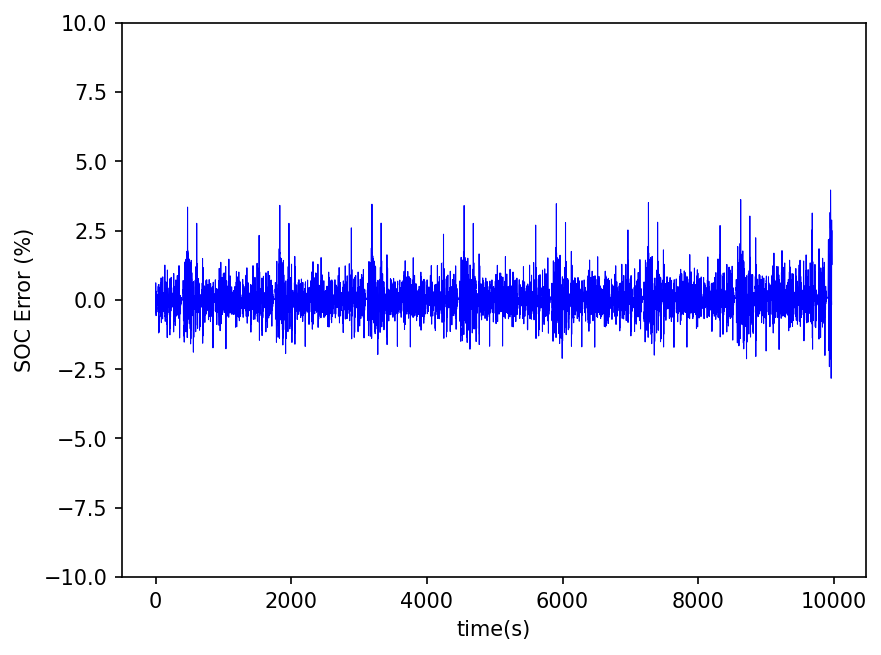

RMSE(0.005170), MAE(0.003467)


In [ ]:
Error_rate = []
Error = []

for step in range(len(prediction_graph)):
        # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
        Error_rate.append((prediction_graph[step] - y_graph[step]) / y_graph[step] * 100)
        Error.append(Error_rate[step] / 100)
    
RMSE_total = np.sqrt(np.mean(np.square(Error)))
MAE_total = np.mean(np.absolute(Error))
pl.figure(dpi=150)
line = pl.plot(Error_rate)
pl.ylim(-10, 10)
pl.ylabel('SOC Error (%)')
pl.xlabel('time(s)')
pl.setp(line, color='b', linewidth=0.5)
EP=param['num_epochs']
pl.savefig(f'{save_path}\{Fsize}RMSE{RMSE_total:.6f}MAE{MAE_total:.6f}.png')
pl.show()
print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')


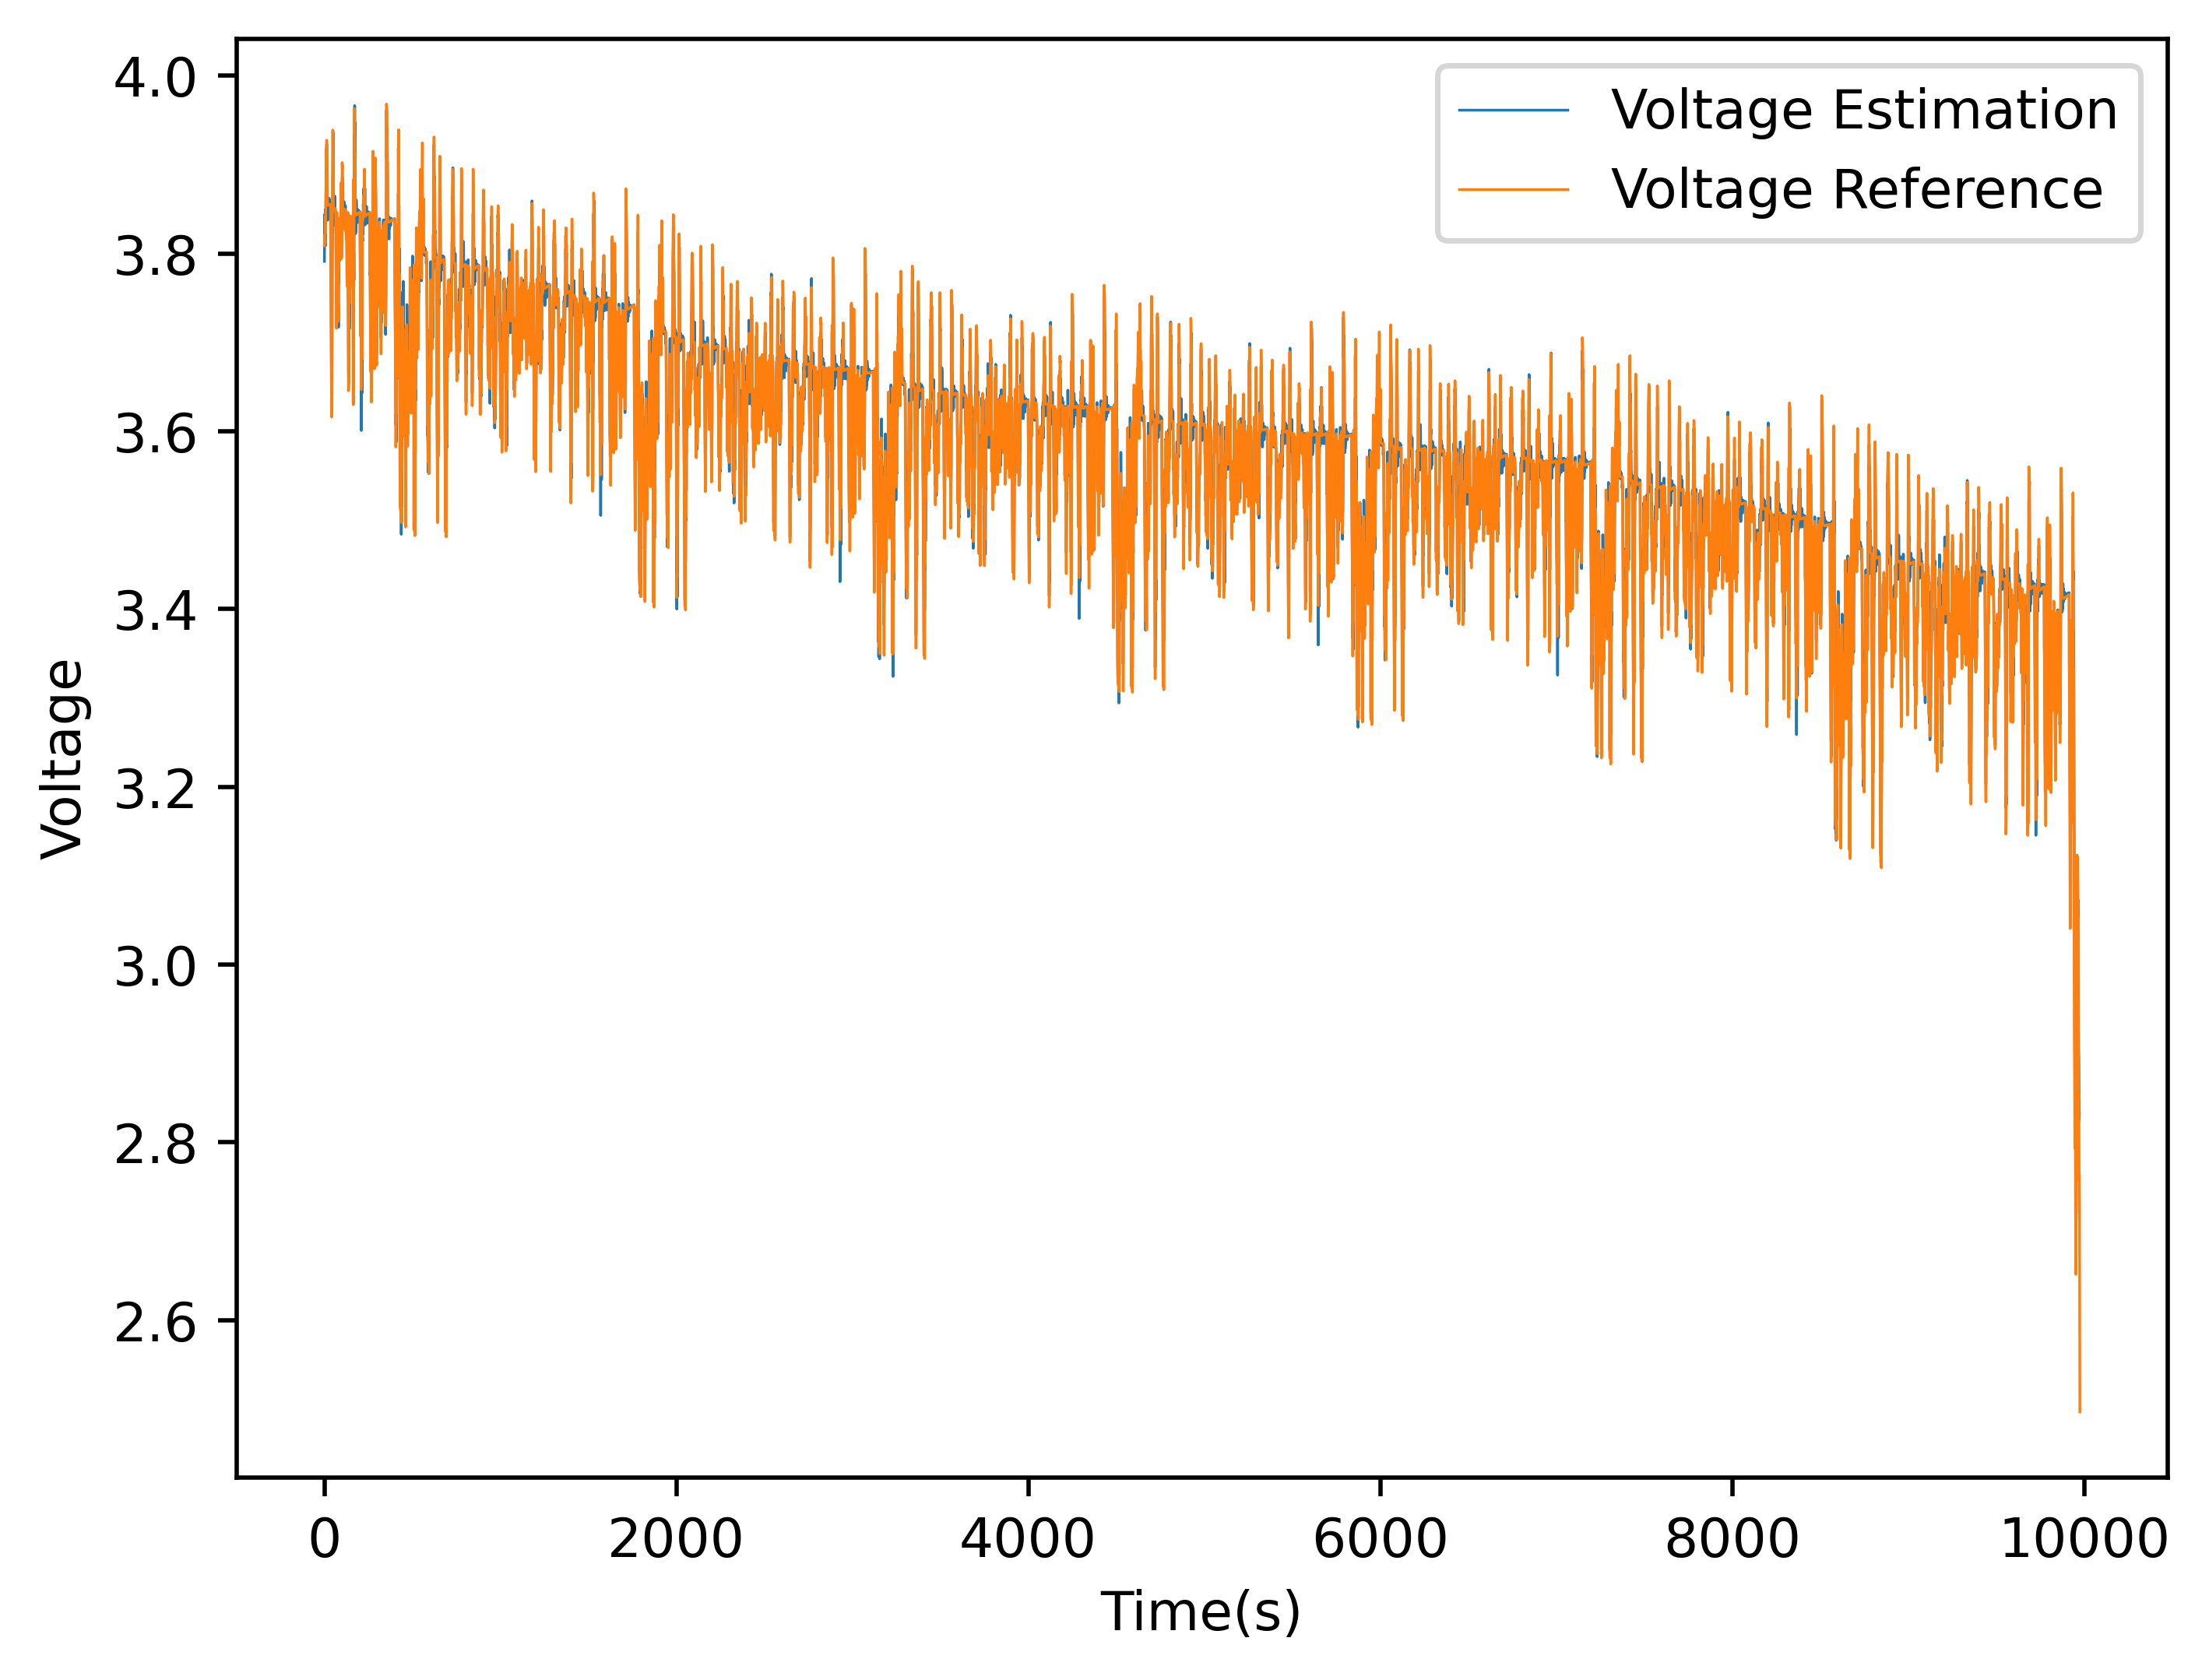

In [ ]:
pl.figure(dpi=500)
pl.ylabel('Voltage')
pl.xlabel('Time(s)')
line = pl.plot(prediction_graph, label = 'Voltage Estimation')
pl.setp(line, linewidth=0.5)

y_line = pl.plot(y_graph, label = 'Voltage Reference')
# y_line = pl.plot(y_graph, label = 'Voltage Reference')
pl.setp(y_line, linewidth=0.5)
pl.legend()
pl.savefig(f'{save_path}\F{Fsize}RMSE{RMSE_total:.6f}MAE{MAE_total:.6f}.png')
pl.show()


In [ ]:
print(prediction_graph.shape)
print(y_graph.shape)
size=(int)(prediction_graph.shape[0]+Fsize-1)
reprediction_graph = relow1(prediction_graph,y_graph,Fsize)[Fsize:]
rey_graph=y_graph[Fsize:size-1]
print(reprediction_graph.shape)
print(rey_graph.shape)
reprediction_graph=reprediction_graph[:9900]
rey_graph=rey_graph[:9900]

(9974, 1)
(9977, 1)
(9969, 1)
(9972, 1)


In [ ]:
# print(prediction_graph.shape)
# print(y_graph.shape)
# reprediction_graph=relow1(prediction_graph,)
# reprediction_graph=reprediction_graph[50:9900]
# rey_graph=y_graph[50:9900]
# print(reprediction_graph.shape)
# print(rey_graph.shape)

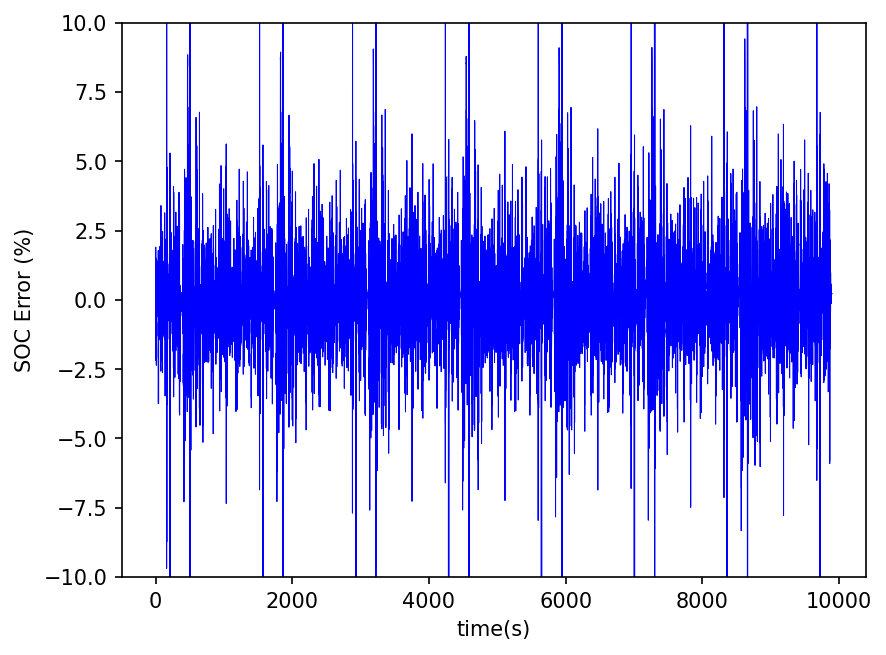

RMSE(0.019697), MAE(0.012674)


In [ ]:
Error_rate = []
Error = []

for step in range(len(reprediction_graph)):
        # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
        Error_rate.append((reprediction_graph[step] - rey_graph[step]) / rey_graph[step] * 100)
        Error.append(Error_rate[step] / 100)
    
RMSE_total = np.sqrt(np.mean(np.square(Error)))
MAE_total = np.mean(np.absolute(Error))
pl.figure(dpi=150)
line = pl.plot(Error_rate)
pl.ylim(-10, 10)
pl.ylabel('SOC Error (%)')
pl.xlabel('time(s)')
pl.setp(line, color='b', linewidth=0.5)
EP=param['num_epochs']
pl.show()
print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')


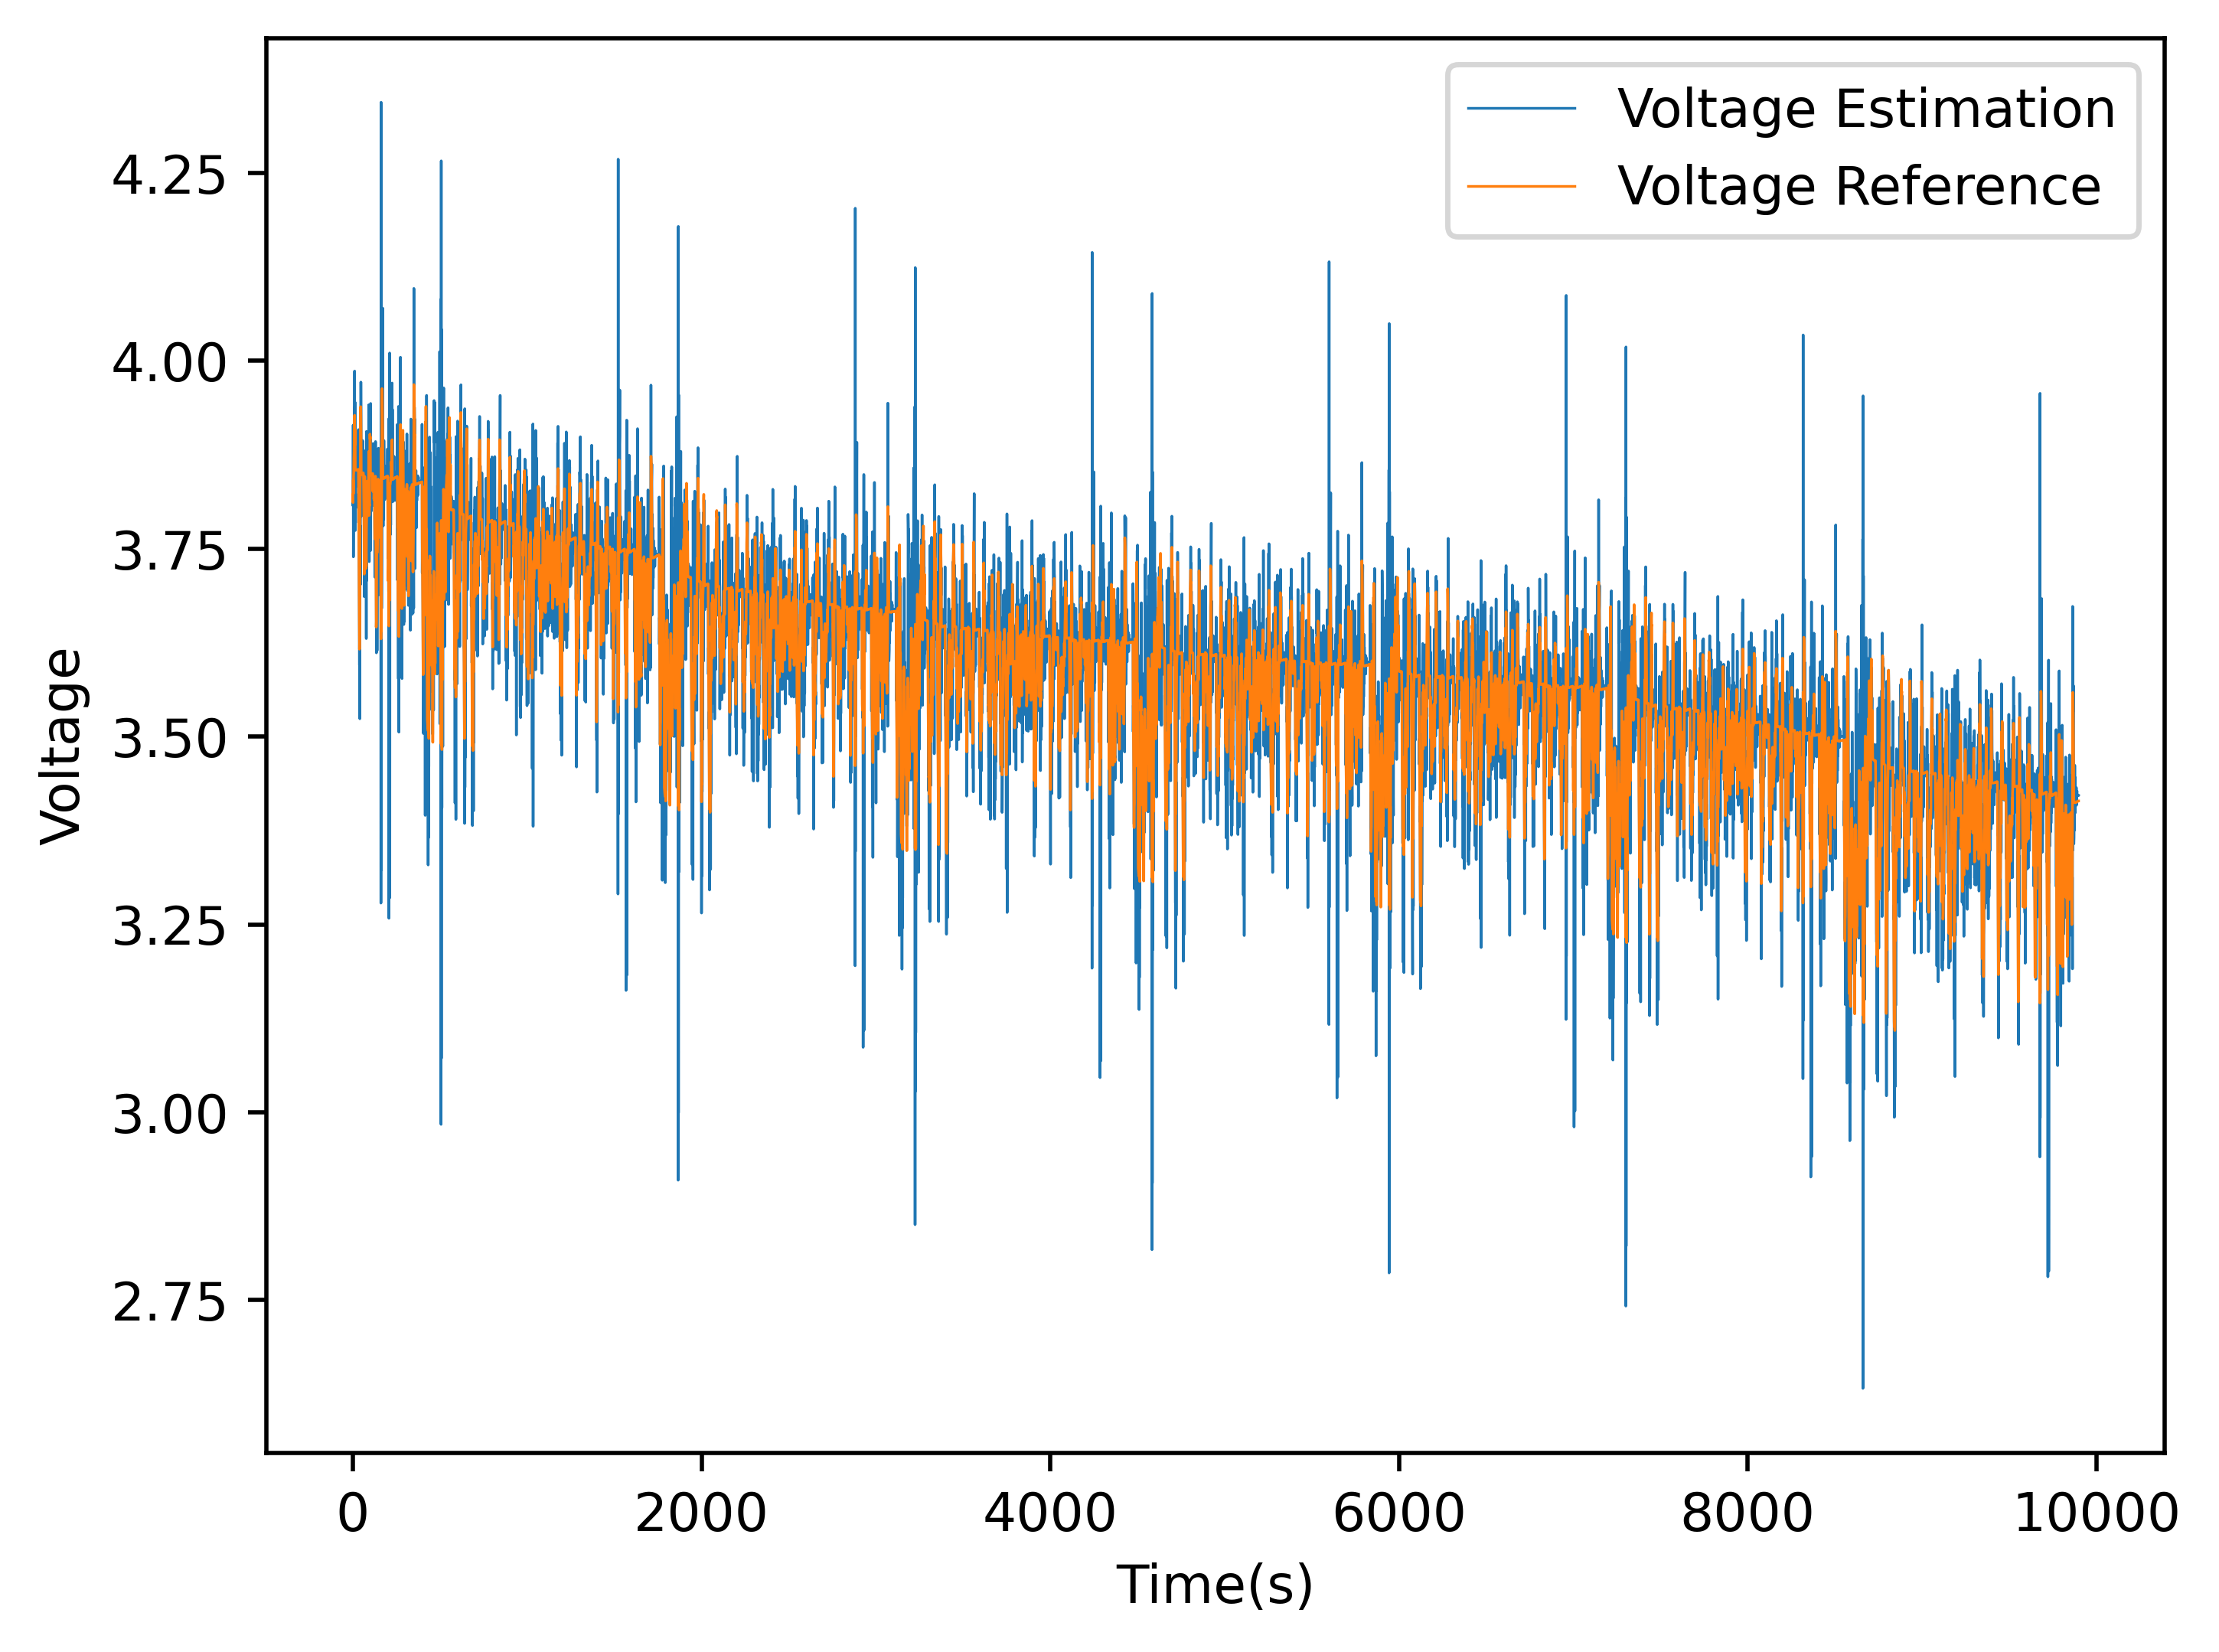

In [ ]:
pl.figure(dpi=500)
pl.ylabel('Voltage')
pl.xlabel('Time(s)')
line = pl.plot(reprediction_graph, label = 'Voltage Estimation')
pl.setp(line, linewidth=0.5)

y_line = pl.plot(rey_graph, label = 'Voltage Reference')
# y_line = pl.plot(y_graph, label = 'Voltage Reference')
pl.setp(y_line, linewidth=0.5)
pl.legend()
pl.show()


In [ ]:
# model = models.Sequential()
# # model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
# model.add(layers.LSTM(param['num_units'], return_sequences = True, input_shape = (None, x_train00.shape[-1])))
# # BatchNormalization()
# model.add(layers.LSTM(16))
# # BatchNormalization()
# model.add(layers.Dense(param['num_dense']))
# # BatchNormalization()
# model.add(layers.Dense(1))
# model.compile(loss = 'mse', optimizer = 'Adam') 
# model.summary()

# model2 = models.Sequential()
# # model.add(layers.Conv1D(param['num_filters'], param['window'], padding='causal', input_shape = (None, x_train00.shape[-1])))
# model2.add(layers.LSTM(param['num_units'], return_sequences = True, input_shape = (None, x_train00.shape[-1])))
# # BatchNormalization()
# model2.add(layers.LSTM(16))
# # BatchNormalization()
# model2.add(layers.Dense(param['num_dense']))
# # BatchNormalization()
# model2.add(layers.Dense(1))
# model2.compile(loss = 'mse', optimizer = 'Adam') 
# model2.summary()
# EP=0
# for i in range(0,25):
#     EP=EP+param["num_epochs"]
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                  TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model.fit(x_train00, y_train00, epochs=EP, verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                  TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model.fit(x_train01, y_train01, epochs=EP, verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])
    
#     model.load_weights(file_path)
#     prediction = model.predict(x_test)

#     Lowprediction=prediction
    
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                       TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model2.fit(Ex_train00, Ey_train00, epochs=EP, verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])
#     callback_list = [ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True),
#                      TensorBoard(log_dir=log_dir, histogram_freq=hist_freq)]
#     fitdata = model2.fit(Ex_train01, Ey_train01, epochs=EP, verbose = 0, validation_split = 0.2, callbacks=callback_list,batch_size=param['batch'])

#     from calendar import EPOCH

#     model.load_weights(file_path)
#     prediction = model.predict(Ex_test)
#     Realprediction=Lowprediction + prediction-plus
#     y_graph = y_test
#     prediction_graph = flatten_2Dto1D(Realprediction)

#     Error_rate = []
#     Error = []

#     for step in range(len(prediction_graph)):
#          # Error_rate.append((prediction_graph[step] - savedata_cap_test[step]) / savedata_cap_test[step] * 100)
#          Error_rate.append((prediction_graph[step] - y_graph[step]) / y_graph[step] * 100)
#          Error.append(Error_rate[step] / 100)
    

#     RMSE_total = np.sqrt(np.mean(np.square(Error)))
#     MAE_total = np.mean(np.absolute(Error))
#     pl.figure(dpi=150)
#     line = pl.plot(Error_rate)
#     pl.ylim(-10, 10)
#     pl.ylabel('SOC Error (%)')
#     pl.xlabel('time(s)')
#     pl.setp(line, color='b', linewidth=0.5)
#     pl.savefig(f'{save_path}\Epoch {EP} RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')
#     pl.show()
#     print(f'RMSE({RMSE_total:.6f}), MAE({MAE_total:.6f})')
#     pl.figure(dpi=500)
#     pl.ylabel('Voltage')
#     pl.xlabel('Time(s)')
#     line = pl.plot(prediction_graph, label = 'Voltage Estimation')
#     pl.setp(line, linewidth=0.5)

#     # y_line = pl.plot(savedata_cap_test, label = 'Voltage Reference')
#     y_line = pl.plot(y_graph, label = 'Voltage Reference')
#     pl.setp(y_line, linewidth=0.5)
#     pl.legend()
#     pl.savefig(f'{save_path}\ESTI Epoch {EP} RMSE {RMSE_total:.6f},MAE {MAE_total:.6f}.png')
#     pl.show()
